<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Sampling(Down_%26_UP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the data
df = pd.read_csv("breast-cancer-data.csv")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [3]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Seems no missing Data

In [8]:
# Convert Categorical (diagnosis) column to  numerical
map = {'malignant' : 1, 'benign' : 0}
df.diagnosis = df.diagnosis.map(map)

In [97]:
df.diagnosis.value_counts(normalize=True)#.plot.pie(subplots=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

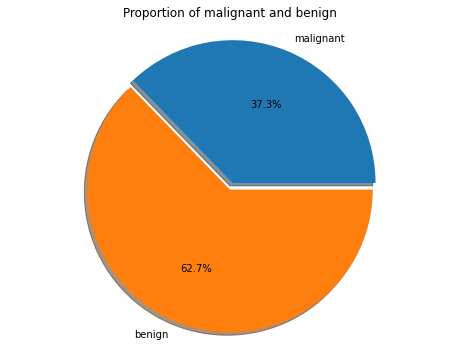

In [15]:
labels = 'malignant', "benign"
sizes = [df.diagnosis[df.diagnosis == 1].count(), df.diagnosis[df.diagnosis == 0].count()]
explode = (0.05, 0)

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title("Proportion of malignant and benign")
plt.show()

It's a clear class imbalance problem.

## Fit the Model on Original Data

In [31]:
# split features and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape

((569, 30), (569,))

In [32]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=14,stratify = y)

In [33]:
# initialising KNN
knn = KNeighborsClassifier()
grid_param = { 'n_neighbors' : list(range(2,11)) , 'algorithm' : ['auto','ball_tree','kd_tree','brute'] }
grid = GridSearchCV(knn,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 10}

In [35]:
grid.best_score_

0.9472151898734177

In [40]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9005847953216374

In [42]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.91      0.93      0.92       107
   malignant       0.89      0.84      0.86        64

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [43]:
# initialising RandomForestClassifier
tree = RandomForestClassifier(random_state= 14,)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['gini','entropy'] }
grid = GridSearchCV(tree,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=14,
                               

In [44]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [45]:
grid.best_score_

0.9698417721518988

In [46]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9473684210526315

In [47]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.97      0.94      0.96       107
   malignant       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [75]:
# initialising GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=14)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['friedman_mse','mse','mae'] }
grid = GridSearchCV(gradient,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [49]:
grid.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 100}

In [50]:
grid.best_score_

0.9673417721518988

In [51]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.935672514619883

In [52]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.94      0.95      0.95       107
   malignant       0.92      0.91      0.91        64

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# Upsampling using SMOTE

In [76]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=1)
X_sam, y_sam = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_sam))


Resampled dataset shape Counter({1: 357, 0: 357})


In [77]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.3, random_state=14,stratify = y_sam)

In [78]:
# initialising KNN
knn = KNeighborsClassifier()
grid_param = { 'n_neighbors' : list(range(2,11)) , 'algorithm' : ['auto','ball_tree','kd_tree','brute'] }
grid = GridSearchCV(knn,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

In [80]:
grid.best_score_

0.9539393939393939

In [81]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9023255813953488

In [82]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.87      0.94      0.91       107
   malignant       0.94      0.86      0.90       108

    accuracy                           0.90       215
   macro avg       0.91      0.90      0.90       215
weighted avg       0.91      0.90      0.90       215



In [83]:
# initialising RandomForestClassifier
tree = RandomForestClassifier(random_state= 14,)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['gini','entropy'] }
grid = GridSearchCV(tree,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=14,
                               

In [84]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [85]:
grid.best_score_

0.9819595959595959

In [86]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9348837209302325

In [87]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.92      0.95      0.94       107
   malignant       0.95      0.92      0.93       108

    accuracy                           0.93       215
   macro avg       0.94      0.93      0.93       215
weighted avg       0.94      0.93      0.93       215



In [88]:
# initialising GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=14)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['friedman_mse','mse','mae'] }
grid = GridSearchCV(gradient,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [89]:
grid.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 100}

In [90]:
grid.best_score_

0.9779393939393939

In [91]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9302325581395349

In [92]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.91      0.95      0.93       107
   malignant       0.95      0.91      0.93       108

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



## **Downsampling**

In [99]:
from sklearn.utils import resample

# Separate majority and minority classes
df_ben = df[df.diagnosis==0]
df_mal = df[df.diagnosis==1]

print("The minority sample size is: {}".format(len(df_mal))) 

# Downsample majority class
df_ben_ds = resample(df_ben, replace=False,    # sample without replacement
                             n_samples=212,     # to match minority class
                             random_state=1) # reproducible results

# Combine minority class with downsampled majority class
df_ds = pd.concat([df_ben_ds, df_mal])
 
# Display new class counts
df_ds.diagnosis.value_counts()

The minority sample size is: 212


1    212
0    212
Name: diagnosis, dtype: int64

In [100]:
# split features and target
X = df_ds.iloc[:,:-1]
y = df_ds.iloc[:,-1]
X.shape,y.shape

((424, 30), (424,))

In [102]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=14,stratify = y)

In [103]:
# initialising KNN
knn = KNeighborsClassifier()
grid_param = { 'n_neighbors' : list(range(2,11)) , 'algorithm' : ['auto','ball_tree','kd_tree','brute'] }
grid = GridSearchCV(knn,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

In [105]:
grid.best_score_

0.945762711864407

In [106]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9140625

In [107]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.92      0.91      0.91        64
   malignant       0.91      0.92      0.91        64

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128



In [108]:
# initialising RandomForestClassifier
tree = RandomForestClassifier(random_state= 14,)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['gini','entropy'] }
grid = GridSearchCV(tree,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=14,
                               

In [109]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [110]:
grid.best_score_

0.9593220338983052

In [111]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9609375

In [112]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       1.00      0.92      0.96        64
   malignant       0.93      1.00      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128



In [113]:
# initialising GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=14)
grid_param = { 'n_estimators' : [100,200,300,400,500] , 'criterion' : ['friedman_mse','mse','mae'] }
grid = GridSearchCV(gradient,grid_param)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [114]:
grid.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 200}

In [115]:
grid.best_score_

0.9389830508474576

In [116]:
pred = grid.predict(X_test)
grid.score(X_test,y_test)

0.9609375

In [117]:
print(classification_report(y_test, pred, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.98      0.94      0.96        64
   malignant       0.94      0.98      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128



In this example, Down-sample performed well, but remember with down-sample, we r actually changing the distribution i.e. mean and S.D. Thats means, now our data is no more inference population .